In [73]:
#Load data into a pandas dataframe
import pandas as pd
import numpy as np

df = pd.read_sas(r"/workspaces/myfolder/Bees/dst6.sas7bdat", encoding='latin-1')

In [74]:
#We want to plot a heatmap of months in which the plants flower, assuming we have all flowering plants in the data
df = df[['year','plot','date','plant species']]
#Create a month columns to track the months
df['month'] = df['date'].dt.month
df.head(10)

,year,plot,date,plant species,month
0,2016.0,non-native,2016-09-21,Trifolium repens,9
1,2016.0,non-native,2016-09-21,Cosmos bipinnatus,9
2,2016.0,non-native,2016-09-21,Cosmos bipinnatus,9
3,2016.0,native,2016-09-21,Monarda punctata,9
4,2016.0,native,2016-09-21,Monarda punctata,9
5,2016.0,native,2016-09-21,Monarda punctata,9
6,2016.0,native,2016-09-21,Bidens aristosa,9
7,2016.0,native,2016-09-21,Bidens aristosa,9
8,2016.0,native,2016-09-21,Bidens aristosa,9
9,2016.0,native,2016-09-21,Bidens aristosa,9


In [75]:
#Turn the months into dummy coded columns that we can sum over
df = pd.get_dummies(df, columns=['month'], dtype=float)

#Rename months for clarity and plotting
df.rename(columns=dict(month_4='April',month_5='May',month_6='June',month_7='July',month_8='August',month_9='September',month_10='October'), inplace=True)

df.head(10)

,year,plot,date,plant species,April,May,June,July,August,September,October
0,2016.0,non-native,2016-09-21,Trifolium repens,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2016.0,non-native,2016-09-21,Cosmos bipinnatus,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2016.0,non-native,2016-09-21,Cosmos bipinnatus,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2016.0,native,2016-09-21,Monarda punctata,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2016.0,native,2016-09-21,Monarda punctata,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,2016.0,native,2016-09-21,Monarda punctata,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,2016.0,native,2016-09-21,Bidens aristosa,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7,2016.0,native,2016-09-21,Bidens aristosa,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8,2016.0,native,2016-09-21,Bidens aristosa,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9,2016.0,native,2016-09-21,Bidens aristosa,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [76]:
#Separate data into native and non-native plants for plotting a heatmap
native_df = df[df['plot']=='native']
non_native_df = df[df['plot']=='non-native']

#Roll up data to get number of records for each plant for each month
native_plot = native_df.groupby(['plant species','year'])[['April','May','June','July','August','September','October']].agg('sum')
non_native_plot = non_native_df.groupby(['plant species','year'])[['April','May','June','July','August','September','October']].agg('sum')

native_plot.head()

April  May  June  July  August  September  October
plant species     year                                                      
Asclepias tuberos 2017.0    0.0  0.0  20.0   0.0     0.0        0.0      0.0
Bidens aristosa   2016.0    0.0  0.0   0.0   0.0     0.0       26.0      0.0
                  2017.0    0.0  0.0   0.0   0.0     0.0       24.0      2.0
Chamaecrista fasc 2016.0    0.0  0.0   0.0   4.0     0.0        1.0      0.0
                  2017.0    0.0  0.0   0.0  44.0    19.0        0.0      0.0

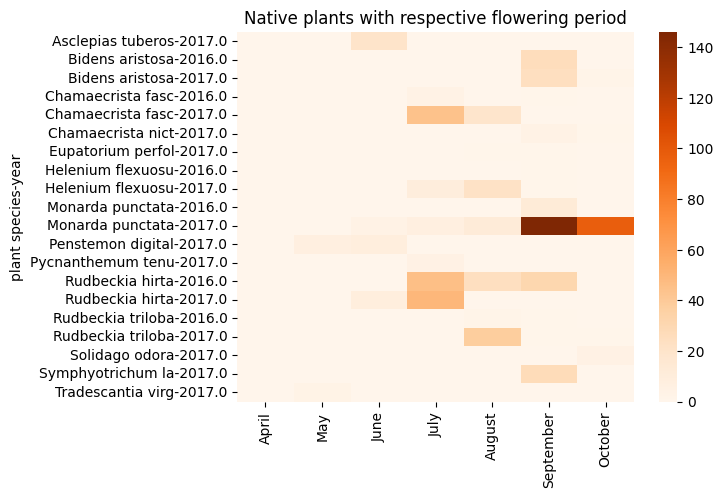

In [77]:
import matplotlib as pyplot
import seaborn as sns

sns.heatmap(native_plot, cmap='Oranges').set_title('Native plants with respective flowering period');

#https://matplotlib.org/stable/gallery/color/colormap_reference.html
#above is a reference to the colormap if you want to change how the plot looks just change the cmap option

#https://seaborn.pydata.org/generated/seaborn.heatmap.html
#above is the doc page for the heatmap plot we are using

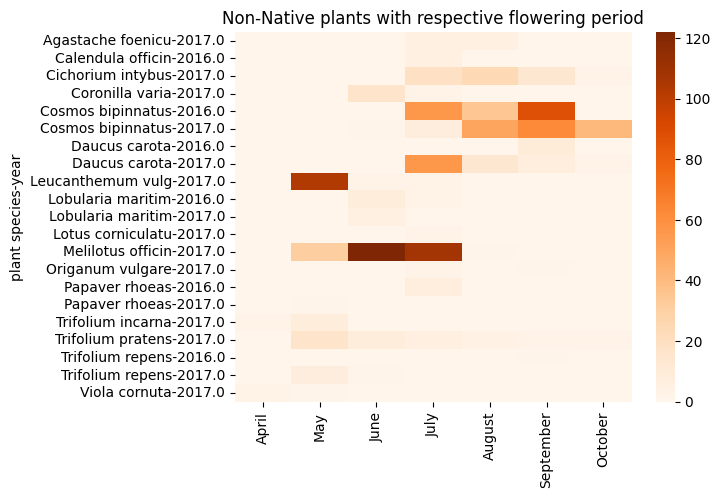

In [78]:
sns.heatmap(non_native_plot, cmap='Oranges').set_title('Non-Native plants with respective flowering period');